In [1]:
# Import required Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# reading the datafile
df = pd.read_csv('../Data/Watson_healthcare.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
def features (df):

    df['BusinessTravel'] = np.where(df['BusinessTravel'] == 'Travel_Frequently', 1, 0)
    df['Education']= np.where(df['Education'] == 5, 1, 0)
    df['EducationField'] = np.where((df['EducationField'] == "Life Sciences") | (df['EducationField'] == "Medical") | (df['EducationField'] == "Other"), 1, 0)
    df['EnvironmentSatisfaction'] = np.where(df['EnvironmentSatisfaction'] == 1, 1, 0)
    df['JobInvolvement'] = np.where((df['JobInvolvement'] == 1)|(df['JobInvolvement'] == 2), 1, 0)
    df['JobRole'] = np.where((df['JobRole'] == 'Nurse') | (df['JobRole']== "Other") , 1, 0)
    df['JobSatisfaction']= np.where(df['JobSatisfaction'] == 5, 1, 0)
    df['MaritalStatus']= np.where((df['MaritalStatus'] == 'Single'), 1, 0)
    df['Shift']= np.where((df['Shift'] == 0) | (df['Shift']== 3) , 1, 0)
    df['WorkLifeBalance']= np.where(df['WorkLifeBalance'] == 1, 1, 0)
    df['Attrition']= df['Attrition'].replace({'No':0,'Yes':1})
    df['OverTime']= df['OverTime'].replace({'No':0,'Yes':1})
    columns_to_drop=['EmployeeID','EmployeeCount','Gender','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','JobLevel']
    df.drop(columns=columns_to_drop, inplace=True)
    return df


In [5]:
# import Features1 as fe
# import numpy as np
# fe.features(df)


In [6]:
features (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,Cardiology,1,0,1,0,94,...,8,1,1,8,0,1,6,4,0,5
1,49,0,1,279,Maternity,8,0,1,0,61,...,1,0,0,10,3,0,10,7,1,7
2,37,1,0,1373,Maternity,2,0,1,0,92,...,6,1,1,7,3,0,0,0,0,0
3,33,0,1,1392,Maternity,3,0,1,0,56,...,1,1,1,8,3,0,8,7,3,0
4,27,0,0,591,Maternity,2,0,1,1,40,...,9,0,0,6,3,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,0,471,Neurology,24,0,0,0,66,...,1,1,1,1,3,1,1,0,0,0
1672,46,0,0,1125,Cardiology,10,0,0,0,94,...,2,1,0,15,3,0,3,2,1,2
1673,20,0,0,959,Maternity,1,0,1,0,83,...,1,0,1,1,0,0,1,0,0,0
1674,39,0,0,466,Neurology,1,0,1,0,65,...,1,0,0,21,3,0,21,6,11,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1676 non-null   int64 
 1   Attrition                1676 non-null   int64 
 2   BusinessTravel           1676 non-null   int32 
 3   DailyRate                1676 non-null   int64 
 4   Department               1676 non-null   object
 5   DistanceFromHome         1676 non-null   int64 
 6   Education                1676 non-null   int32 
 7   EducationField           1676 non-null   int32 
 8   EnvironmentSatisfaction  1676 non-null   int32 
 9   HourlyRate               1676 non-null   int64 
 10  JobInvolvement           1676 non-null   int32 
 11  JobRole                  1676 non-null   int32 
 12  JobSatisfaction          1676 non-null   int32 
 13  MaritalStatus            1676 non-null   int32 
 14  MonthlyIncome            1676 non-null  

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'Shift', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
!pip install imbalanced-learn

In [11]:
#Define the target

X= df.drop('Attrition',axis=1)
y= df['Attrition']

In [12]:



# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), ['Department']),
    ],
    remainder='passthrough'
)

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)
# other_X= df[['BusinessTravel','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','JobRole','MaritalStatus','Shift','OverTime','WorkLifeBalance']]
# X_scaled= pd.concat([transformed_X, other_X], axis=1)

# X_scaled.head()
transformed_X.head()


,num__Age,num__DailyRate,num__DistanceFromHome,num__HourlyRate,num__MonthlyIncome,num__MonthlyRate,num__NumCompaniesWorked,num__TotalWorkingYears,num__TrainingTimesLastYear,num__YearsAtCompany,...,remainder__Education,remainder__EducationField,remainder__EnvironmentSatisfaction,remainder__JobInvolvement,remainder__JobRole,remainder__JobSatisfaction,remainder__MaritalStatus,remainder__OverTime,remainder__Shift,remainder__WorkLifeBalance
0,0.452933,0.750837,-1.008126,1.412260,-0.110748,0.727502,2.154939,-0.426280,-2.178097,-0.169491,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.329511,-1.299105,-0.149829,-0.221278,-0.293315,1.488074,-0.671100,-0.170938,0.151012,0.486551,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.014644,1.425849,-0.885512,1.313258,-0.936423,-1.666173,1.347499,-0.553950,0.151012,-1.153553,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-0.423644,1.473174,-0.762898,-0.468784,-0.763164,1.243144,-0.671100,-0.426280,0.151012,0.158530,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,-1.081078,-0.521970,-0.885512,-1.260803,-0.644909,0.328579,2.558659,-0.681621,0.151012,-0.825533,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
transformed_X.columns

Index(['num__Age', 'num__DailyRate', 'num__DistanceFromHome',
       'num__HourlyRate', 'num__MonthlyIncome', 'num__MonthlyRate',
       'num__NumCompaniesWorked', 'num__TotalWorkingYears',
       'num__TrainingTimesLastYear', 'num__YearsAtCompany',
       'num__YearsInCurrentRole', 'num__YearsSinceLastPromotion',
       'num__YearsWithCurrManager', 'cat__Department_Cardiology',
       'cat__Department_Maternity', 'cat__Department_Neurology',
       'remainder__BusinessTravel', 'remainder__Education',
       'remainder__EducationField', 'remainder__EnvironmentSatisfaction',
       'remainder__JobInvolvement', 'remainder__JobRole',
       'remainder__JobSatisfaction', 'remainder__MaritalStatus',
       'remainder__OverTime', 'remainder__Shift',
       'remainder__WorkLifeBalance'],
      dtype='object')

In [14]:
from sklearn.feature_selection import RFE

model = LogisticRegression(random_state=0, max_iter=4000)
rfe = RFE(model,n_features_to_select=20)

# Fit RFE on the training data
rfe.fit(transformed_X, y)

# Get the selected features
selected_features_rfe = transformed_X.columns[rfe.support_]

# Print the selected features
print("Selected Features using RFE:")
print(selected_features_rfe)

Selected Features using RFE:
Index(['num__Age', 'num__DistanceFromHome', 'num__MonthlyIncome',
       'num__NumCompaniesWorked', 'num__TotalWorkingYears',
       'num__TrainingTimesLastYear', 'num__YearsInCurrentRole',
       'num__YearsSinceLastPromotion', 'num__YearsWithCurrManager',
       'cat__Department_Cardiology', 'remainder__BusinessTravel',
       'remainder__Education', 'remainder__EducationField',
       'remainder__EnvironmentSatisfaction', 'remainder__JobInvolvement',
       'remainder__JobRole', 'remainder__MaritalStatus', 'remainder__OverTime',
       'remainder__Shift', 'remainder__WorkLifeBalance'],
      dtype='object')


In [15]:
transformed_X= transformed_X[selected_features_rfe]

In [16]:
from imblearn.over_sampling import SMOTE

# Assuming you have separate X (features) and y (target) variables
smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(transformed_X, y)



In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:

# Modeling
model = LogisticRegression(random_state=11, max_iter = 1000)
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)





Training Accuracy: 0.9110922946655376
Testing Accuracy: 0.8839285714285714


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       296
           1       0.51      0.72      0.60        40

    accuracy                           0.88       336
   macro avg       0.73      0.82      0.77       336
weighted avg       0.91      0.88      0.89       336



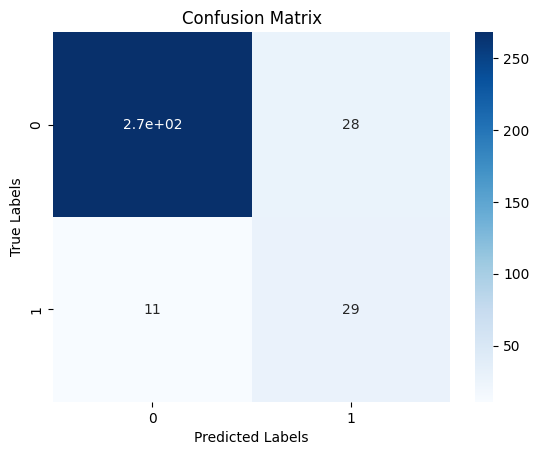

In [19]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = [
    {'penalty': ['elasticnet', 'l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Create the random forest classifier
model = LogisticRegression(random_state=11, max_iter = 1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'C': 10}
Best Score:  0.9102445827075736
Training Accuracy: 0.9123624047417442
Testing Accuracy: 0.8898809523809523


c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\asmaa\anaconda3\envs\test_env\lib\site-packages\sklearn\linear_model\_logistic.py

Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       296
           1       0.53      0.72      0.61        40

    accuracy                           0.89       336
   macro avg       0.74      0.82      0.77       336
weighted avg       0.91      0.89      0.90       336



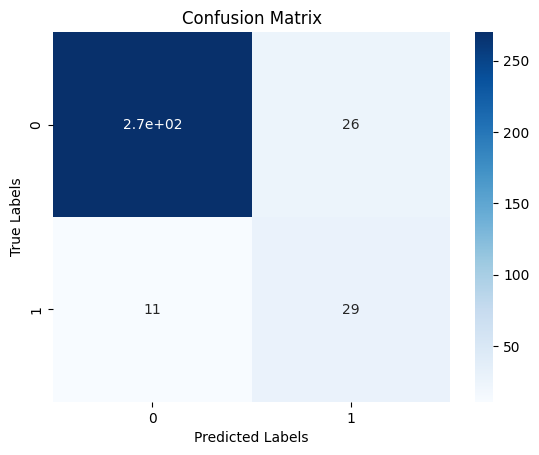

In [21]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
# Ada Boost Classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier
# Modeling
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9648602878916173
Testing Accuracy: 0.9196428571428571


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       296
           1       0.53      0.72      0.61        40

    accuracy                           0.89       336
   macro avg       0.74      0.82      0.77       336
weighted avg       0.91      0.89      0.90       336



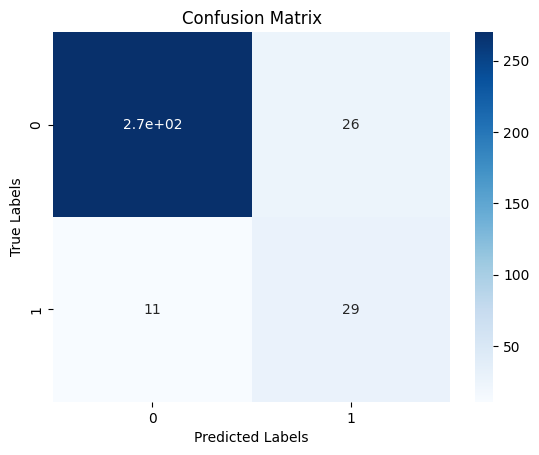

In [24]:
# Make predictions on the testing data
y_pred = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# Create the AdaBoostClassifier
ada_boost = AdaBoostClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 50}
Best Score:  0.9475257103952412
Training Accuracy: 0.9648602878916173
Testing Accuracy: 0.9196428571428571


Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       296
           1       0.68      0.62      0.65        40

    accuracy                           0.92       336
   macro avg       0.81      0.79      0.80       336
weighted avg       0.92      0.92      0.92       336



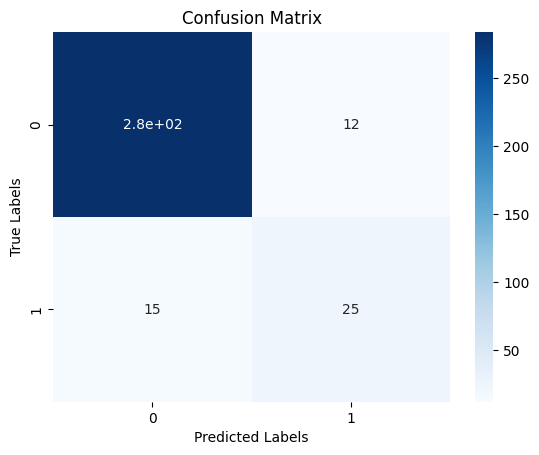

In [26]:
# Make predictions on the testing data
y_pred1 = best_model.predict(X_test)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test, y_pred1))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
X_train.shape

(2362, 20)

In [27]:
#RNN

Epoch 1/20
60/60 [==============================] - 2s 9ms/step - loss: 0.5622 - accuracy: 0.7184 - val_loss: 0.5907 - val_accuracy: 0.7421
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.8115 - val_loss: 0.5318 - val_accuracy: 0.7844
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8624 - val_loss: 0.4281 - val_accuracy: 0.8499
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8851 - val_loss: 0.3967 - val_accuracy: 0.8647
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8883 - val_loss: 0.3559 - val_accuracy: 0.8816
Epoch 6/20
60/60 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.8920 - val_loss: 0.3247 - val_accuracy: 0.8922
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8962 - val_loss: 0.3119 - val_accuracy: 0.8922
Epoch 8/20
60/60 [==

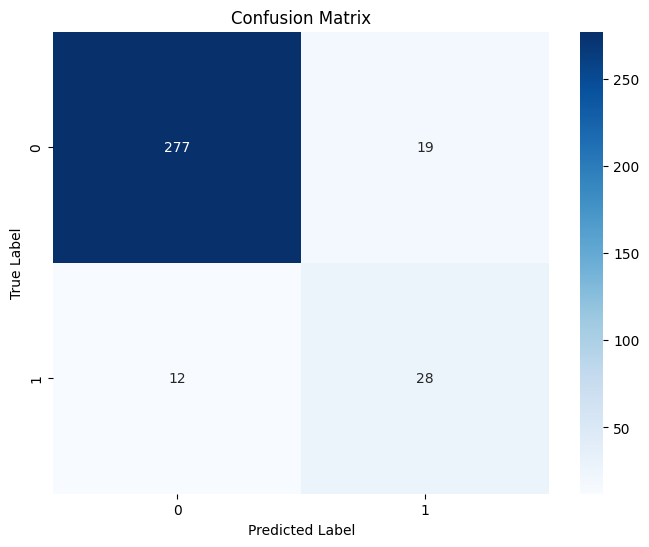

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       296
           1       0.60      0.70      0.64        40

    accuracy                           0.91       336
   macro avg       0.78      0.82      0.80       336
weighted avg       0.92      0.91      0.91       336



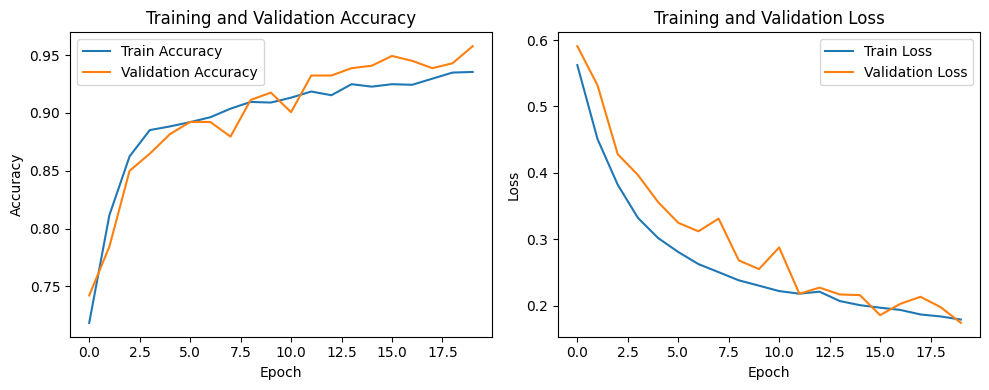

In [30]:

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Set the number of timesteps and features
timesteps = 1
features = 20

# Reshape the input data to match the RNN input shape
X_train_rnn = np.reshape(X_train, (X_train.shape[0], timesteps, features))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(timesteps, features)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Reshape the test data
X_test_rnn = np.reshape(X_test, (X_test.shape[0], timesteps, features))

# Predict probabilities on the test data
y_pred_probs = model.predict(X_test_rnn)

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)

# Get the training and validation accuracy scores
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
